In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 
import numpy as np
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
import pandas as pd
PL = pd.read_csv('path-loss.csv')

In [3]:
import pandas as pd
PL = pd.read_csv('path-loss.csv')

In [5]:
PL.head()

,longitude,latitude,elevation,altitude,clutterheight,distance,loss
0,3.163405,6.675160,51,55,6,61,129
1,3.163405,6.675160,51,55,6,61,132
2,3.163405,6.675169,51,55,6,61,132
3,3.163405,6.675169,51,55,6,61,134
4,3.163405,6.675178,51,55,6,61,134


In [7]:
PL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   longitude      3616 non-null   float64
 1   latitude       3616 non-null   float64
 2   elevation      3616 non-null   int64  
 3   altitude       3616 non-null   int64  
 4   clutterheight  3616 non-null   int64  
 5   distance       3616 non-null   int64  
 6   loss           3616 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 197.9 KB


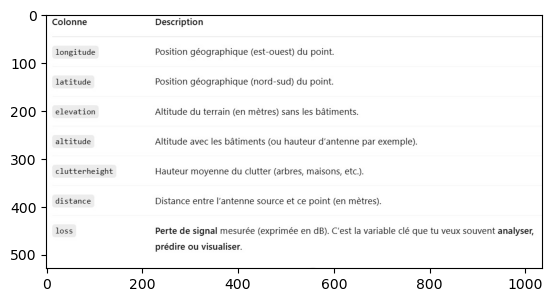

In [9]:
img = mpimg.imread('abc.jpg')
plt.imshow(img)
plt.show()

In [9]:
PL.isnull().sum().sum()

0

In [11]:
PL.describe()

,longitude,latitude,elevation,altitude,clutterheight,distance,loss
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,3.163656,6.674493,54.283462,54.752765,5.777102,439.527931,143.077434
std,0.003758,0.002534,5.816332,3.879191,2.683505,269.577560,9.128563
min,3.155924,6.667566,45.000000,49.000000,4.000000,1.000000,104.000000
25%,3.160620,6.672988,49.000000,52.000000,4.000000,249.000000,139.000000
50%,3.163415,6.674525,54.000000,54.000000,6.000000,376.000000,145.000000
75%,3.166737,6.675745,59.000000,57.000000,6.000000,660.250000,149.000000
max,3.170550,6.678928,64.000000,64.000000,16.000000,1132.000000,162.000000


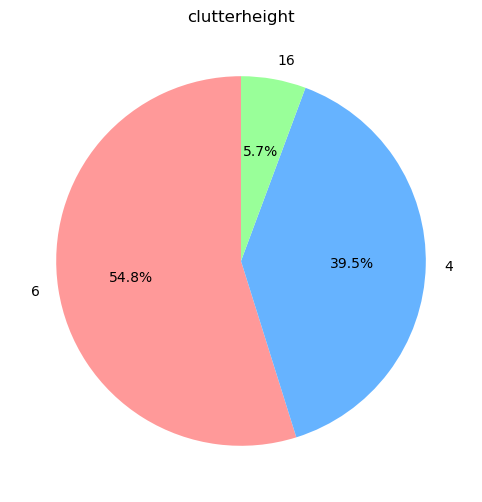

In [21]:
LOSS = PL["clutterheight"].value_counts()
plt.figure(figsize=(8, 6))
LOSS.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('clutterheight')
plt.ylabel('')  
plt.show()

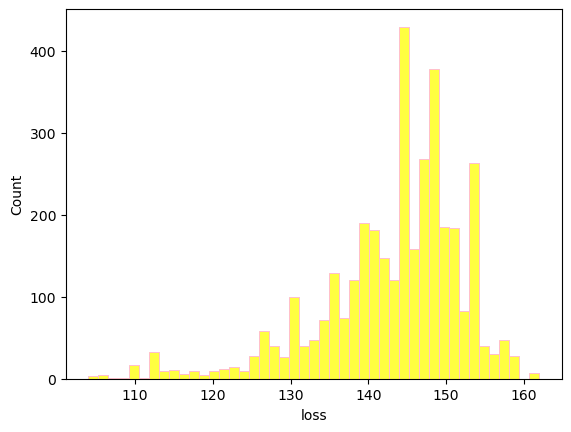

In [41]:
sns.histplot(PL['loss'],color='yellow', edgecolor='pink')

plt.show()

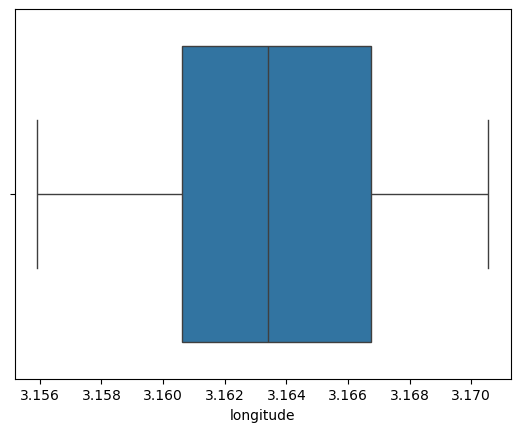

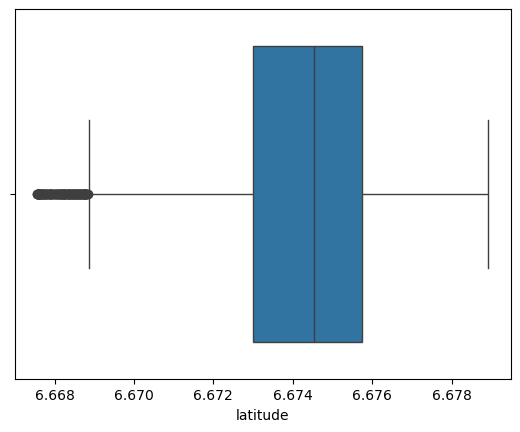

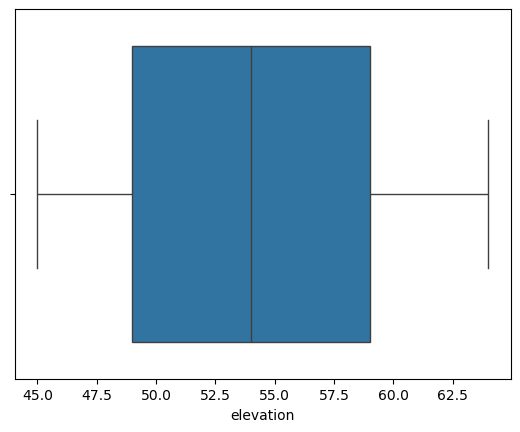

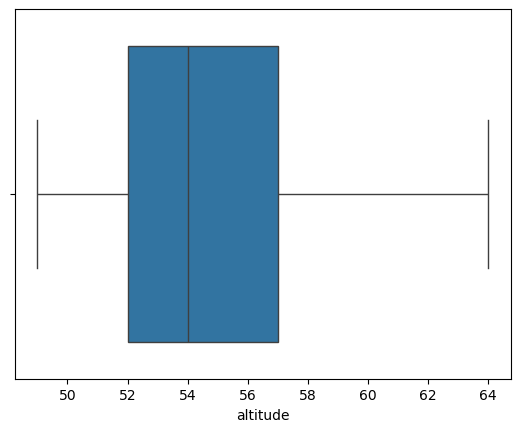

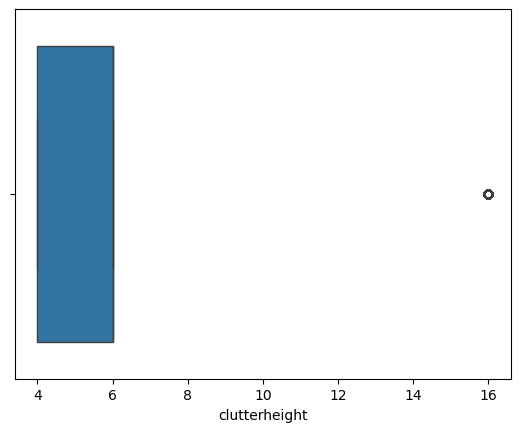

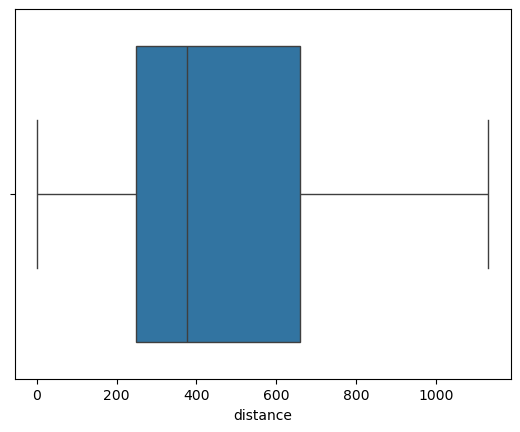

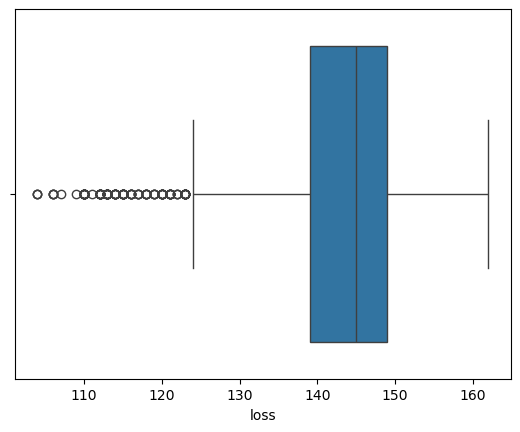

In [22]:
for i in PL.columns:
    sns.boxplot(x=PL[i])
    plt.show()

In [10]:
Q1 = PL["loss"].quantile(0.25)
Q3 =  PL["loss"].quantile(0.75)
IQR = Q3 - Q1
liminf = Q1 - 1.5*IQR
limsup = Q3 + 1.5*IQR

In [11]:
data1 = PL.copy()

In [12]:
for i in data1.columns:
    Q1 =  data1[i].quantile(0.25)
    Q3 =  data1[i].quantile(0.75)
    IQR = Q3-Q1
    liminf = Q1 - 1.5*IQR
    limsup = Q3 + 1.5*IQR
    mean_value = data1[i].mean()
    data1[i] = np.where((data1[i] < liminf) | (data1[i] > limsup), mean_value,data1[i])

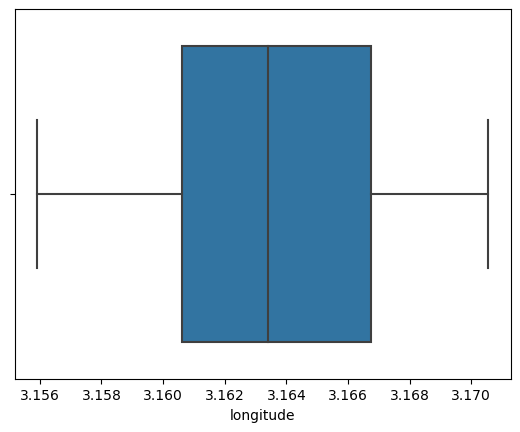

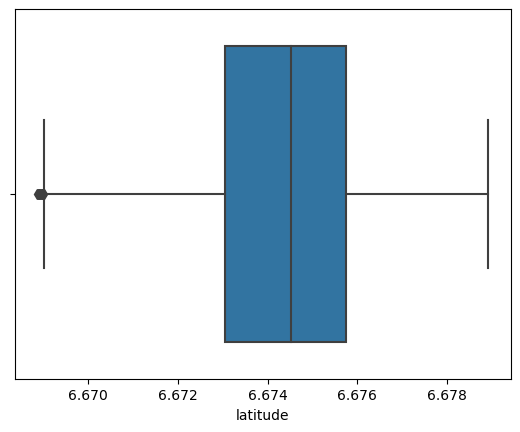

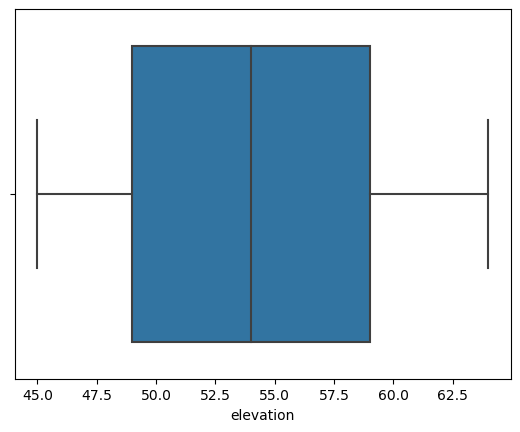

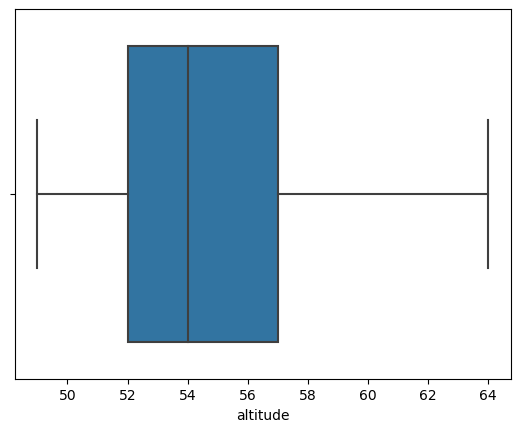

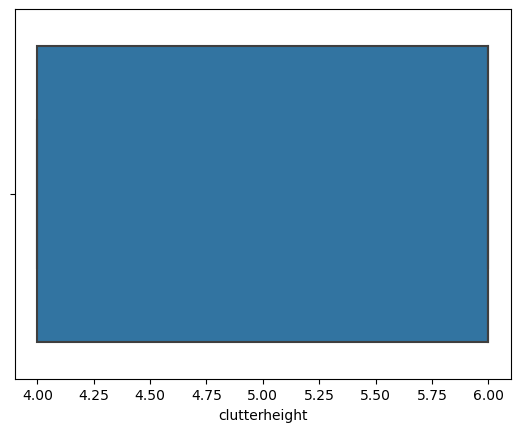

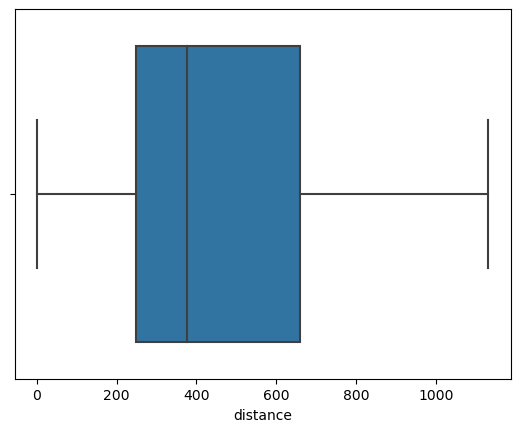

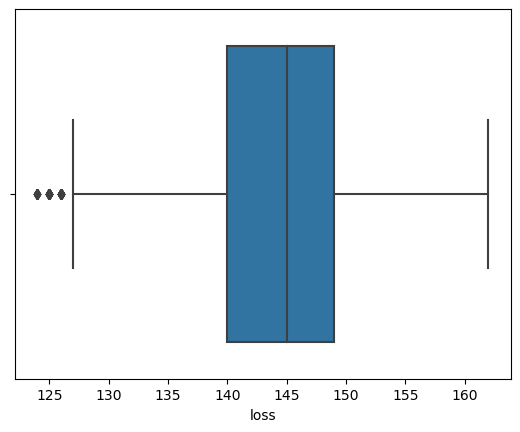

In [18]:
for i in data1.columns:
    sns.boxplot(x=data1[i])
    plt.show()

In [29]:
data1.describe()

,longitude,latitude,elevation,altitude,clutterheight,distance,loss
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,3.163656,6.674693,54.283462,54.752765,5.197540,439.527931,144.118488
std,0.003758,0.002262,5.816332,3.879191,0.968907,269.577560,7.233760
min,3.155924,6.668861,45.000000,49.000000,4.000000,1.000000,124.000000
25%,3.160620,6.673049,49.000000,52.000000,4.000000,249.000000,140.000000
50%,3.163415,6.674525,54.000000,54.000000,6.000000,376.000000,145.000000
75%,3.166737,6.675745,59.000000,57.000000,6.000000,660.250000,149.000000
max,3.170550,6.678928,64.000000,64.000000,6.000000,1132.000000,162.000000


In [11]:
X=PL.drop(['loss'] , axis = 1)
Y=PL['loss']

In [13]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=45)

In [15]:
model = LinearRegression()

In [17]:
model.fit(X_train,Y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [21]:
coeffs = np.polyfit(Y_test, y_pred, deg=1)  # deg=1 pour une régression linéaire
regression_line = np.poly1d(coeffs)
print( 'l''équation de la droite de régression linéaire est : y=', coeffs[0] ,'* x +',coeffs[1])

léquation de la droite de régression linéaire est : y= 0.28206801153200844 * x + 102.97029733956471


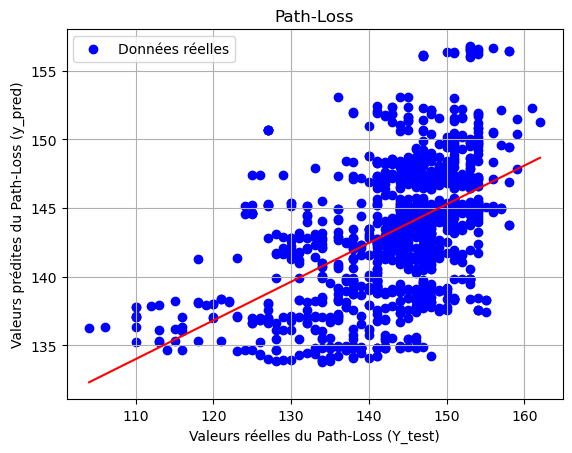

In [25]:
plt.scatter(Y_test, y_pred, color='blue', label='Données réelles')
x_vals = np.linspace(min(Y_test), max(Y_test), 100)
y_vals = regression_line(x_vals)
plt.plot(x_vals, y_vals, color='red')
plt.title('Path-Loss')
plt.xlabel('Valeurs réelles du Path-Loss (Y_test)')
plt.ylabel('Valeurs prédites du Path-Loss (y_pred)')

plt.legend()
plt.grid(True)
plt.show()


In [37]:
model1 = sm.OLS(Y , X).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                   loss   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.974e+05
Date:                Mon, 05 May 2025   Prob (F-statistic):                        0.00
Time:                        17:04:19   Log-Likelihood:                         -12606.
No. Observations:                3616   AIC:                                  2.522e+04
Df Residuals:                    3610   BIC:                                  2.526e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [113]:
print(model.feature_names_in_)


['longitude' 'latitude' 'elevation' 'altitude' 'clutterheight' 'distance']


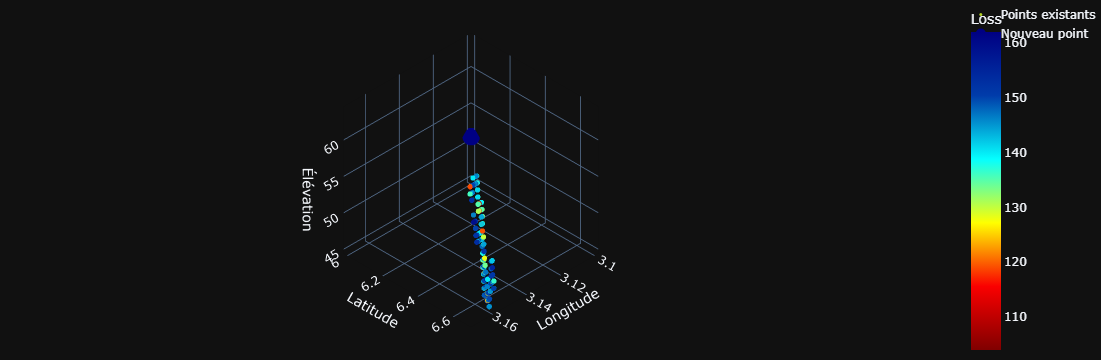

In [25]:
import pandas as pd
import plotly.graph_objects as go
PL = pd.read_csv('path-loss.csv')
new_data = pd.DataFrame([{
    'longitude': 3.1,
    'latitude': 6,
    'elevation': 51,
    'altitude': 56,         
    'clutterheight': 6,    
    'distance': 62
}])
predicted_loss = model.predict(new_data)[0]

new_point = {
    'longitude': new_data['longitude'][0],
    'latitude': new_data['latitude'][0],
    'elevation': new_data['elevation'][0],
    'loss': predicted_loss
}


fig = go.Figure()


fig.add_trace(go.Scatter3d(
    x=PL['longitude'],
    y=PL['latitude'],
    z=PL['elevation'],
    mode='markers',
    marker=dict(
        size=3,
        color=PL['loss'], 
        colorscale='jet',
        opacity=0.8,
        reversescale=True,
        colorbar=dict(title='Loss')
    ),
    name="Points existants"
))


fig.add_trace(go.Scatter3d(
    x=[new_point['longitude']],
    y=[new_point['latitude']],
    z=[new_point['elevation']],
    mode='markers',
    marker=dict(
        size=10,
        color=[new_point['loss']], 
        colorscale='jet',          
        cmin=PL['loss'].min(),     
        cmax=PL['loss'].max(),
        opacity=1,
        showscale=False 
    ),
    name="Nouveau point"
))


fig.update_layout(
    template="plotly_dark",
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Élévation'
    )
)

fig.layout.scene.camera.projection.type = "orthographic"
fig.show()
fig.write_html("vis3D")


In [23]:
new_point

{'longitude': 3.1, 'latitude': 6, 'elevation': 51, 'loss': -626.1001222612585}

In [29]:
print ('prediction loss= ', abs(predicted_loss))
if abs(predicted_loss) > 150:
    print("La place de ce point n'est pas bonne")
elif 140 < abs(predicted_loss) <= 150:
    print("La place de ce point est acceptable")
elif 130 < abs(predicted_loss) <= 140:
    print("La place de ce point est bonne")
elif 120 < abs(predicted_loss) <= 130:
    print("La place de ce point est très bonne")
else:
    print("La place de ce point est excellente")



prediction loss=  626.1001222612585
La place de ce point n'est pas bonne


In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_pred)
mse

61.07350800359077